# Learning/Experimenting with TSNE

In [29]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

In [52]:
iris = load_iris()
x = iris.data
y = iris.target 

In [57]:
tsne = TSNE(n_components=2, verbose=1, random_state=450)
z = tsne.fit_transform(x) 

c:\Users\pilug\Documents\ANN-Research\ANN\Aaryan\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\pilug\Documents\ANN-Research\ANN\Aaryan\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.773903
[t-SNE] KL divergence after 1000 iterations: 0.125171


In [58]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
#df["comp-3"] = z[:,2]

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

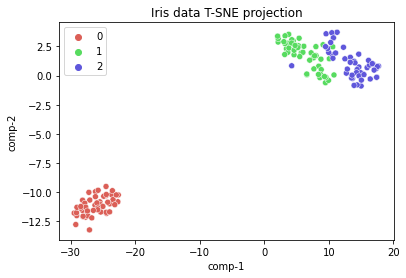

In [59]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection") 


In [25]:
import plotly.graph_objects as go
import plotly.express as px

In [38]:
splot = go.Figure(data=[go.Scatter3d(
        x=df["comp-1"],
        y=df["comp-2"],
        z=df["comp-3"],
        mode = "markers",
        marker=dict(
            showscale=True,
            cmax=0,
            cmin=2,
            size=6,
            color=y,                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        ),
    )])

splot.show()

# Now doing with my data

In [81]:
from BHDVCS_tf import DvcsData
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv("dvcs_bkm_xs_June2021_4pars.csv")
errValues = [0.0, 0.01, 0.025, 0.05, 0.1, 0.15, 0.25, 0.30]

def getReals(setNum, numPhi = 45):
    df = pd.read_csv("dvcs_bkm_xs_June2021_4pars.csv")
    return df.loc[numPhi * setNum, 'gReH': 'gReHTilde']

def getColorMappingValues(amountofSets):
    ReHMean = []
    ReEMean = []
    ReHtildeMean = []
    for set in range(amountofSets):
        for errF in errValues:
            data = pd.read_csv("Predictions\Method2-"+ str(set) + "-" + str(errF) +  ".csv")
            
            # NOTE we take max(mean, -1) because if data is more than 100% error it should just cap in terms of heatmapping
            #Inverted because currently smaller values are red and larger values are green
            #Want to make opposite (smaller %error-values = green and larger %error-values = red) therefore we multiply by -1
            ReHMean.append(100 * max(-abs(np.mean(data.ReH)), -1))
            ReEMean.append(100 * max(-abs(np.mean(data.ReE)), -1))
            ReHtildeMean.append(100 * max(-abs(np.mean(data.ReHtilde)), -1))

    return ReHMean, ReEMean, ReHtildeMean  

def getSizes(amountofSets):
    ReHMean = []
    ReEMean = []
    ReHtildeMean = []
    for set in range(amountofSets):
        for errF in errValues: 
            data = pd.read_csv("Predictions\Method2-"+ str(set) + "-" + str(errF) +  ".csv")
            
            ReHMean.append(10 + pow(np.std(data.ReH), 0.75))
            ReEMean.append(10 + pow(np.std(data.ReE), 0.75))
            ReHtildeMean.append(10 + pow(np.std(data.ReHtilde), 0.75))

    return ReHMean, ReEMean, ReHtildeMean

#Returns lists that contain the kinematics for each index
def getkinematics(numSets):
    errs = []
    xb = []
    t = []
    for i in range(numSets):
        #gets a set's kinematics
        kvar, Q, x, ts = df.loc[45 * i, 'k': 't']
        
        #adds set's kinematics to running list
        errs.extend(errValues)
        xb.extend([x] * len(errValues))
        t.extend([ts] * len(errValues))
    
    return xb, t, errs

In [83]:
h, e, tilde = getColorMappingValues(403)
hs, es, tildes = getSizes(403)
xb, t, errs = getkinematics(403)
x = np.column_stack((xb, t, errs))

# 2D TSNE

In [100]:
tsne = TSNE(n_components=2, verbose=0, random_state=314)
z = tsne.fit_transform(x) 

c:\Users\pilug\Documents\ANN-Research\ANN\Aaryan\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\pilug\Documents\ANN-Research\ANN\Aaryan\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [101]:
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

In [103]:
df["size"] = hs
df["col"] = h
splot = go.Figure(data=go.Scatter(
    x = df["comp-1"],
    y = df["comp-2"],
    mode='markers',
    marker=dict(
        showscale=True,
        cmax=0,
        cmin=-100,
        size=df["size"],
        color=df["col"],                # set color to an array/list of desired values
        colorscale='RdYlGn',   # choose a colorscale
        opacity=1
        ),
    )
)

splot.update_traces
splot.update_layout(
    title = 't-SNE on Data for ReH',
    template='ggplot2',
    margin=dict(r=0, b=40, l=0, t=50)
)

splot.show()

In [104]:
df["size"] = es
df["col"] = e
splot = go.Figure(data=go.Scatter(
    x = df["comp-1"],
    y = df["comp-2"],
    mode='markers',
    marker=dict(
        showscale=True,
        cmax=0,
        cmin=-100,
        size=df["size"],
        color=df["col"],                # set color to an array/list of desired values
        colorscale='RdYlGn',   # choose a colorscale
        opacity=1
        ),
    )
)

splot.update_traces
splot.update_layout(
    title = 't-SNE on Data for ReE',
    template='ggplot2',
    margin=dict(r=0, b=40, l=0, t=50)
)

splot.show()

In [105]:
df["size"] = tildes
df["col"] = tilde
splot = go.Figure(data=go.Scatter(
    x = df["comp-1"],
    y = df["comp-2"],
    mode='markers',
    marker=dict(
        showscale=True,
        cmax=0,
        cmin=-100,
        size=df["size"],
        color=df["col"],                # set color to an array/list of desired values
        colorscale='RdYlGn',   # choose a colorscale
        opacity=1
        ),
    )
)

splot.update_traces
splot.update_layout(
    title = 't-SNE on Data for ReHtilde',
    template='ggplot2',
    margin=dict(r=0, b=40, l=0, t=50)
)

splot.show()

# 3D Components

In [ ]:
tsne = TSNE(n_components=3, verbose=0, random_state=314)
z = tsne.fit_transform(x) 

In [96]:
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-3"] = z[:,2]

In [97]:
df["size"] = hs
df["col"] = h
splot = go.Figure(data=go.Scatter3d(
    x = df["comp-1"],
    y = df["comp-2"],
    z = df["comp-3"],
    mode='markers',
    marker=dict(
        showscale=True,
        cmax=0,
        cmin=-100,
        size=df["size"],
        color=df["col"],                # set color to an array/list of desired values
        colorscale='RdYlGn',   # choose a colorscale
        opacity=1
        ),
    )
)

splot.update_traces
splot.update_layout(
    title = 't-SNE on Data for ReH',
    scene = dict(
            xaxis_title='1',
            yaxis_title='2',
            zaxis_title='3',
            aspectmode='cube',
        ),
    template='ggplot2',
    margin=dict(r=0, b=40, l=0, t=50)
)

splot.show()

In [98]:
df["size"] = es
df["col"] = e

splot = go.Figure(data=go.Scatter3d(
    x = df["comp-1"],
    y = df["comp-2"],
    z = df["comp-3"],
    mode='markers',
    marker=dict(
        showscale=True,
        cmax=0,
        cmin=-100,
        size=df["size"],
        color=df["col"],                # set color to an array/list of desired values
        colorscale='RdYlGn',   # choose a colorscale
        opacity=1
        ),
    )
)

splot.update_traces
splot.update_layout(
    title = 't-SNE on Data for ReE',
    scene = dict(
            xaxis_title='1',
            yaxis_title='2',
            zaxis_title='3',
            aspectmode='cube',
        ),
    template='ggplot2',
    margin=dict(r=0, b=40, l=0, t=50)
)

splot.show()

In [99]:
df["size"] = tildes
df["col"] = tilde

splot = go.Figure(data=go.Scatter3d(
    x = df["comp-1"],
    y = df["comp-2"],
    z = df["comp-3"],
    mode='markers',
    marker=dict(
        showscale=True,
        cmax=0,
        cmin=-100,
        size=df["size"],
        color=df["col"],                # set color to an array/list of desired values
        colorscale='RdYlGn',   # choose a colorscale
        opacity=1
        ),
    )
)

splot.update_traces
splot.update_layout(
    title = 't-SNE on Data for ReHtilde',
    scene = dict(
            xaxis_title='1',
            yaxis_title='2',
            zaxis_title='3',
            aspectmode='cube',
        ),
    template='ggplot2',
    margin=dict(r=0, b=40, l=0, t=50)
)

splot.show()